# Predicting Black Friday Purchases

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## EDA

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
#checking for any missing values

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
# Looking at distribution of age groups

df.Age.value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [10]:
df.Gender.value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [11]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [12]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [13]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [14]:
df.loc[df['User_ID']==1000001]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
39180,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842
78144,1000001,P00102642,F,0-17,10,A,2,0,4,8.0,9.0,2763
78145,1000001,P00110842,F,0-17,10,A,2,0,1,2.0,5.0,11769
78146,1000001,P00004842,F,0-17,10,A,2,0,3,4.0,12.0,13645
116848,1000001,P00117942,F,0-17,10,A,2,0,5,15.0,NaN,8839
116849,1000001,P00258742,F,0-17,10,A,2,0,5,NaN,NaN,6910


In [15]:
df2 = df.loc[df['User_ID']==1000001]

In [16]:
np.mean(df2.Purchase)

9545.514285714286

In [17]:
df2.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,35.0,35.0,35.0,35.000000,21.000000,14.000000,35.000000
mean,1000001.0,10.0,0.0,6.085714,6.285714,10.571429,9545.514286
std,0.0,0.0,0.0,4.616922,4.220697,3.897026,4639.871552
min,1000001.0,10.0,0.0,1.000000,2.000000,5.000000,612.000000
25%,1000001.0,10.0,0.0,3.000000,4.000000,8.250000,7884.500000
50%,1000001.0,10.0,0.0,4.000000,4.000000,12.000000,9946.000000
75%,1000001.0,10.0,0.0,8.000000,8.000000,12.000000,12305.500000
max,1000001.0,10.0,0.0,20.000000,17.000000,17.000000,19219.000000


In [18]:
# Making a dataframe of average ourchases for each user

average_purchase = pd.DataFrame(df.groupby('User_ID')['Purchase'].mean())
average_purchase.rename(columns = {'Purchase':'avg_purchase'}, inplace = True)
print(min(average_purchase.avg_purchase))
print(max(average_purchase.avg_purchase))
average_purchase

2318.733333333333
18577.893617021276


,avg_purchase
User_ID,
1000001,9545.514286
1000002,10525.610390
1000003,11780.517241
1000004,14747.714286
1000005,7745.292453
...,...
1006036,8007.894942
1006037,9176.540984
1006038,7502.833333


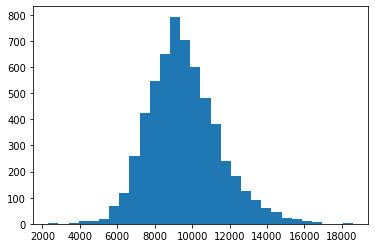

In [19]:
# PLotting a histogram of purchase averages
# y-axis represents number of users
#x-axis represents purchase average

plt.hist(x = average_purchase.avg_purchase, bins = 30, density = False)
plt.show()

In [20]:
# average purchase grouped by city

city_average = pd.DataFrame(df.groupby('City_Category')['Purchase'].mean())
city_average.reset_index(inplace = True)
city_average.rename(columns = {'City_Category':'city', 'Purchase':'avg_purchase'}, inplace = True)
city_average

,city,avg_purchase
0,A,8911.939216
1,B,9151.300563
2,C,9719.920993


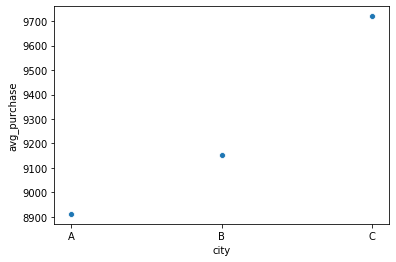

In [21]:
sns.scatterplot(x= city_average['city'], y = city_average.avg_purchase)

In [22]:
# Calculating how many users are in each city

user_city = pd.DataFrame(df.groupby('City_Category')['User_ID'].unique())
user_city.reset_index(inplace = True)
user_city

,City_Category,User_ID
0,A,"[1000001, 1000003, 1000005, 1000006, 1000015, ..."
1,B,"[1000004, 1000007, 1000010, 1000018, 1000021, ..."
2,C,"[1000002, 1000008, 1000009, 1000011, 1000012, ..."


In [23]:
cities = user_city.City_Category
cities

0    A
1    B
2    C
Name: City_Category, dtype: object

In [24]:
for city in cities:
    length = df.loc[df['City_Category']== city]
    print(len(length.User_ID.unique()))

1045
1707
3139


In [25]:
# Double checking code for useres in each city works correctly 
1045+1707+3139

5891

In [26]:
occupation_city = pd.DataFrame(df.groupby('City_Category')['Occupation'].unique())
occupation_city.reset_index(inplace = True)
occupation_city

,City_Category,Occupation
0,A,"[10, 15, 20, 9, 7, 3, 0, 12, 16, 2, 1, 4, 14, ..."
1,B,"[7, 1, 3, 16, 0, 4, 17, 2, 9, 14, 20, 12, 13, ..."
2,C,"[16, 12, 17, 1, 0, 4, 11, 7, 9, 8, 19, 10, 20,..."


In [27]:
jobs = df.Occupation.unique()
jobs

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [28]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [29]:
df2 = df
df2.drop(columns = ['Gender','Age','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_ID','Purchase',
                    'Product_Category_2', 'Product_Category_3'],inplace = True)
df2


,User_ID,Occupation,City_Category
0,1000001,10,A
1,1000001,10,A
2,1000001,10,A
3,1000001,10,A
4,1000002,16,C
...,...,...,...
550063,1006033,13,B
550064,1006035,1,C
550065,1006036,15,B
550066,1006038,1,C


In [30]:
df3 = pd.DataFrame(df2.groupby(['User_ID', 'City_Category'])['Occupation'].unique())

In [31]:
df3.reset_index(inplace = True)
# df3.drop(columns = ['index'], inplace = True)
df3

,User_ID,City_Category,Occupation
0,1000001,A,[10]
1,1000002,C,[16]
2,1000003,A,[15]
3,1000004,B,[7]
4,1000005,A,[20]
...,...,...,...
5886,1006036,B,[15]
5887,1006037,C,[1]
5888,1006038,C,[1]
5889,1006039,B,[0]


### Creating a graph for city and occupation

In [32]:
# this dataframe includes the job number and how many people work each job who live in city B

city_b = df3.loc[df3['City_Category'] == 'B']
city_b.sort_values(by = 'Occupation')
city_b = pd.DataFrame(city_b['Occupation'].value_counts())
city_b.reset_index(inplace = True)
city_b.rename(columns = {'index':'job','Occupation':'number'}, inplace = True)
city_b['job'] = city_b['job'].str.get(0)
city = ['B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B']
city_b['city'] = city
city_b.head()

,job,number,city
0,4,236,B
1,0,203,B
2,7,170,B
3,1,140,B
4,17,136,B


In [33]:
# this dataframe includes the job number and how many people work each job who live in city C


city_c = df3.loc[df3['City_Category'] == 'C']
city_c.sort_values(by = 'Occupation')
city_c = pd.DataFrame(city_c['Occupation'].value_counts())
city_c.reset_index(inplace = True)
city_c.rename(columns = {'index':'job','Occupation':'number'}, inplace = True)
city_c['job'] = city_c['job'].str.get(0)
city = ['C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C']
city_c['city'] = city
city_c.head()

,job,number,city
0,7,386,C
1,0,356,C
2,4,332,C
3,17,293,C
4,1,283,C


In [34]:
# this dataframe includes the job number and how many people work each job who live in city A


city_a = df3.loc[df3['City_Category'] == 'A']
city_a.sort_values(by = 'Occupation')
city_a = pd.DataFrame(city_a['Occupation'].value_counts())
city_a.reset_index(inplace = True)
city_a.rename(columns = {'index':'job','Occupation':'number'}, inplace = True)
city_a['job'] = city_a['job'].str.get(0)
city = ['A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A']
city_a['city'] = city
city_a.head()

,job,number,city
0,4,172,A
1,0,129,A
2,7,113,A
3,1,94,A
4,12,77,A


In [35]:
# combing the three dataframes for easier graphing

city_occupation = pd.concat([city_a, city_b, city_c])

In [36]:
city_occupation[:63]

,job,number,city
0,4,172,A
1,0,129,A
2,7,113,A
3,1,94,A
4,12,77,A
...,...,...,...
16,5,57,C
17,9,56,C
18,18,48,C
19,19,39,C


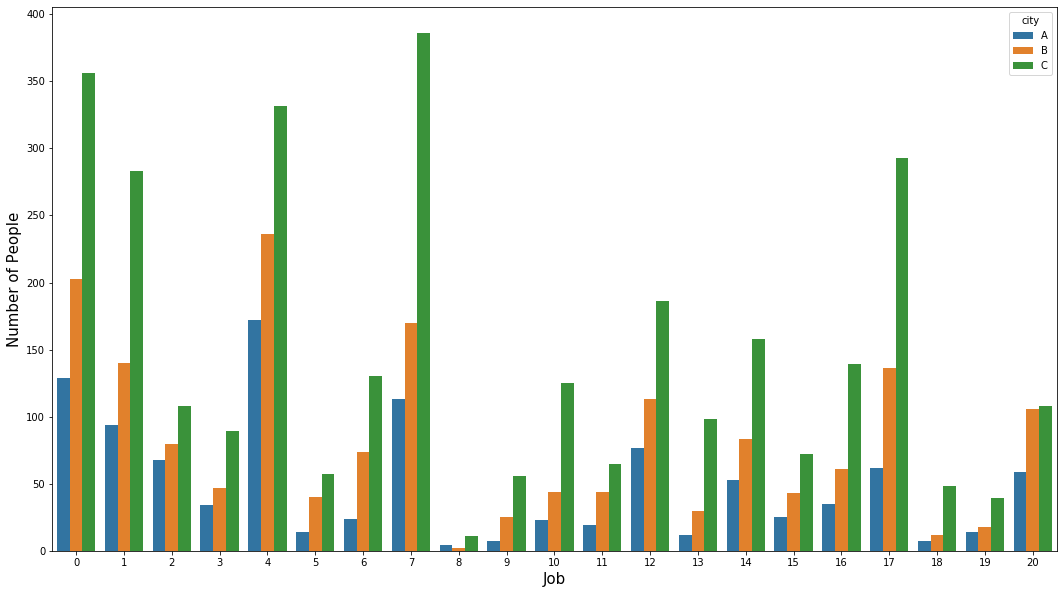

In [37]:
# final graph

plt.figure(figsize = (18,10))
sns.barplot(x = city_occupation['job'], y = city_occupation['number'], hue = city_occupation.city)
plt.ylabel('Number of People', fontsize = 15)
plt.xlabel('Job', fontsize = 15)
plt.title('')
plt.show()

### City C has a greater population than the other two cities, so it is more beneficial to the exploratory process if we look at the percent of population to each job

In [38]:
city_a.head()

,job,number,city
0,4,172,A
1,0,129,A
2,7,113,A
3,1,94,A
4,12,77,A


In [39]:
jobs = list(city_a.job.unique())
jobs

[4, 0, 7, 1, 12, 2, 17, 20, 14, 16, 3, 15, 6, 10, 11, 5, 19, 13, 9, 18, 8]

In [40]:
city_a_values = list(city_a['number'].values)
city_a_values

[172,
 129,
 113,
 94,
 77,
 68,
 62,
 59,
 53,
 35,
 34,
 25,
 24,
 23,
 19,
 14,
 14,
 12,
 7,
 7,
 4]

In [41]:
city_a_jobs = pd.DataFrame(jobs)
city_a_jobs.head()

,0
0,4
1,0
2,7
3,1
4,12


In [42]:
sum(city_a_values)

1045

In [43]:
percents = []
for value in city_a_values:
    percent = round(value/sum(city_a_values),4)
    percents.append(percent)

In [44]:
percents

[0.1646,
 0.1234,
 0.1081,
 0.09,
 0.0737,
 0.0651,
 0.0593,
 0.0565,
 0.0507,
 0.0335,
 0.0325,
 0.0239,
 0.023,
 0.022,
 0.0182,
 0.0134,
 0.0134,
 0.0115,
 0.0067,
 0.0067,
 0.0038]

In [45]:
sum(percents)

1.0

In [46]:
# percent of people working each job for city A

city_a_percents = pd.DataFrame(percents)
city_a_percents.rename(columns = {0:'percent_of_pop_working_this_job'})

,percent_of_pop_working_this_job
0,0.1646
1,0.1234
2,0.1081
3,0.0900
4,0.0737
5,0.0651
6,0.0593
7,0.0565
8,0.0507
9,0.0335


In [47]:
city_a_jobs_and_percents = city_a_percents.merge(city_a_jobs, left_index = True, right_index = True)
city_a_jobs_and_percents.head()

,0_x,0_y
0,0.1646,4
1,0.1234,0
2,0.1081,7
3,0.0900,1
4,0.0737,12


In [48]:
city_a_jobs_and_percents.rename(columns = {'0_x':'percent_of_pop_with_job','0_y':'job'}, inplace = True)
city = ['A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A']
city_a_jobs_and_percents['city'] = city
city_a_jobs_and_percents = city_a_jobs_and_percents.sort_values(by = ['job'], ascending = True)
city_a_jobs_and_percents.head()

,percent_of_pop_with_job,job,city
1,0.1234,0,A
3,0.0900,1,A
5,0.0651,2,A
10,0.0325,3,A
0,0.1646,4,A


In [49]:
jobs = list(city_b.job.unique())
jobs

[4, 0, 7, 1, 17, 12, 20, 14, 2, 6, 16, 3, 11, 10, 15, 5, 13, 9, 19, 18, 8]

In [50]:
city_b_values = list(city_b['number'].values)
city_b_values

[236,
 203,
 170,
 140,
 136,
 113,
 106,
 83,
 80,
 74,
 61,
 47,
 44,
 44,
 43,
 40,
 30,
 25,
 18,
 12,
 2]

In [51]:
city_b_jobs = pd.DataFrame(jobs)
city_b_jobs.head()

,0
0,4
1,0
2,7
3,1
4,17


In [52]:
sum(city_b_values)

1707

In [53]:
percents = []
for value in city_b_values:
    percent = round(value/sum(city_b_values),4)
    percents.append(percent)
percents

[0.1383,
 0.1189,
 0.0996,
 0.082,
 0.0797,
 0.0662,
 0.0621,
 0.0486,
 0.0469,
 0.0434,
 0.0357,
 0.0275,
 0.0258,
 0.0258,
 0.0252,
 0.0234,
 0.0176,
 0.0146,
 0.0105,
 0.007,
 0.0012]

In [54]:
# percent of people working each job for city B

city_b_percents = pd.DataFrame(percents)
city_b_percents.rename(columns = {0:'percent_of_pop_working_this_job'})

,percent_of_pop_working_this_job
0,0.1383
1,0.1189
2,0.0996
3,0.0820
4,0.0797
5,0.0662
6,0.0621
7,0.0486
8,0.0469
9,0.0434


In [55]:
city_b_jobs_and_percents = city_b_percents.merge(city_b_jobs, left_index = True, right_index = True)
city_b_jobs_and_percents.head()

,0_x,0_y
0,0.1383,4
1,0.1189,0
2,0.0996,7
3,0.0820,1
4,0.0797,17


In [56]:
#dataframe of percent working each job who live in city B

city_b_jobs_and_percents.rename(columns = {'0_x':'percent_of_pop_with_job','0_y':'job'}, inplace = True)
city = ['B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B', 'B','B']
city_b_jobs_and_percents['city'] = city
city_b_jobs_and_percents = city_b_jobs_and_percents.sort_values(by = ['job'], ascending = True)
city_b_jobs_and_percents.head()

,percent_of_pop_with_job,job,city
1,0.1189,0,B
3,0.0820,1,B
8,0.0469,2,B
11,0.0275,3,B
0,0.1383,4,B


In [57]:
jobs = list(city_c.job.unique())
jobs

[7, 0, 4, 17, 1, 12, 14, 16, 6, 10, 20, 2, 13, 3, 15, 11, 5, 9, 18, 19, 8]

In [58]:
city_c_values = list(city_c['number'].values)
city_c_values

[386,
 356,
 332,
 293,
 283,
 186,
 158,
 139,
 130,
 125,
 108,
 108,
 98,
 89,
 72,
 65,
 57,
 56,
 48,
 39,
 11]

In [59]:
city_c_jobs = pd.DataFrame(jobs)
city_c_jobs.head()

,0
0,7
1,0
2,4
3,17
4,1


In [60]:
sum(city_c_values)

3139

In [61]:
percents = []
for value in city_c_values:
    percent = round(value/sum(city_c_values),4)
    percents.append(percent)
percents

[0.123,
 0.1134,
 0.1058,
 0.0933,
 0.0902,
 0.0593,
 0.0503,
 0.0443,
 0.0414,
 0.0398,
 0.0344,
 0.0344,
 0.0312,
 0.0284,
 0.0229,
 0.0207,
 0.0182,
 0.0178,
 0.0153,
 0.0124,
 0.0035]

In [62]:
sum(percents)

1.0000000000000002

In [63]:
city_c_percents = pd.DataFrame(percents)
city_c_percents.rename(columns = {0:'percent_of_pop_working_this_job'})

,percent_of_pop_working_this_job
0,0.1230
1,0.1134
2,0.1058
3,0.0933
4,0.0902
5,0.0593
6,0.0503
7,0.0443
8,0.0414
9,0.0398


In [64]:
city_c_jobs_and_percents = city_c_percents.merge(city_c_jobs, left_index = True, right_index = True)
city_c_jobs_and_percents.head()

,0_x,0_y
0,0.1230,7
1,0.1134,0
2,0.1058,4
3,0.0933,17
4,0.0902,1


In [65]:
city_c_jobs_and_percents.rename(columns = {'0_x':'percent_of_pop_with_job','0_y':'job'}, inplace = True)
city = ['C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C','C']
city_c_jobs_and_percents['city'] = city
city_c_jobs_and_percents = city_c_jobs_and_percents.sort_values(by = ['job'], ascending = True)
city_c_jobs_and_percents

,percent_of_pop_with_job,job,city
1,0.1134,0,C
4,0.0902,1,C
11,0.0344,2,C
13,0.0284,3,C
2,0.1058,4,C
16,0.0182,5,C
8,0.0414,6,C
0,0.1230,7,C
20,0.0035,8,C
17,0.0178,9,C


In [66]:
percent_jobs_and_city = pd.concat([city_a_jobs_and_percents,city_b_jobs_and_percents,city_c_jobs_and_percents])
percent_jobs_and_city.head()

,percent_of_pop_with_job,job,city
1,0.1234,0,A
3,0.0900,1,A
5,0.0651,2,A
10,0.0325,3,A
0,0.1646,4,A


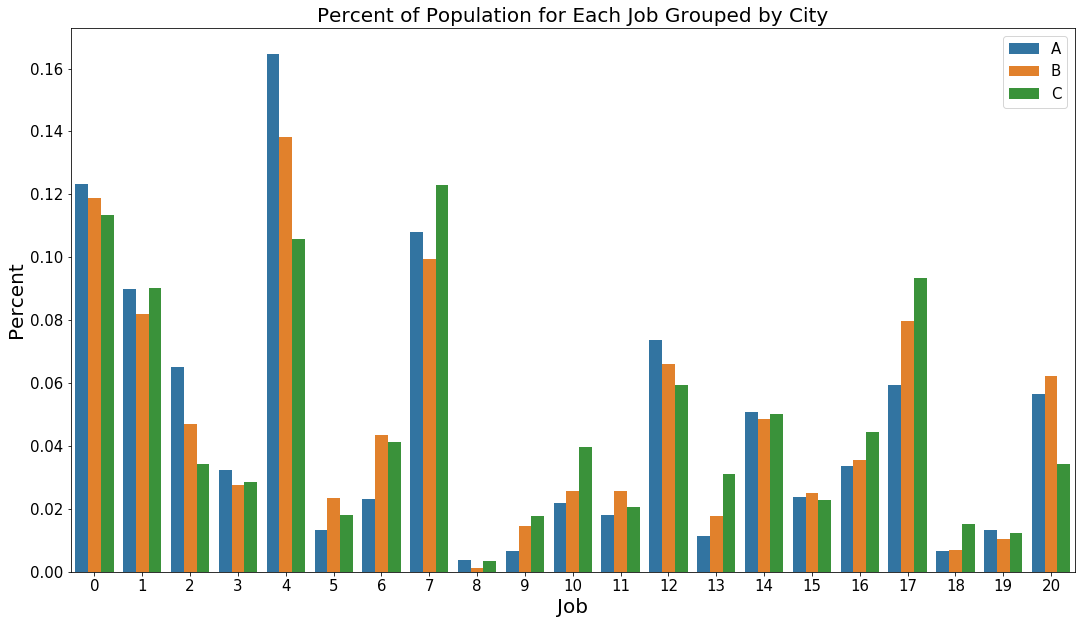

In [67]:
# graphing percent of people with a job living in each city

plt.figure(figsize = (18,10))
sns.barplot(x = percent_jobs_and_city['job'], y = percent_jobs_and_city['percent_of_pop_with_job'], hue = percent_jobs_and_city.city)
plt.ylabel('Percent', fontsize = 20)
plt.xlabel('Job', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Percent of Population for Each Job Grouped by City', fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [68]:
# Pulling 5 jobs that appeal to my interest and graphing them seperately

job_0 = percent_jobs_and_city.loc[percent_jobs_and_city['job']==0]
job_4 = percent_jobs_and_city.loc[percent_jobs_and_city['job']==4]
job_7 = percent_jobs_and_city.loc[percent_jobs_and_city['job']==7]
job_8 = percent_jobs_and_city.loc[percent_jobs_and_city['job']==8]
job_20 = percent_jobs_and_city.loc[percent_jobs_and_city['job']==20]
jobs_5 = pd.concat([job_0,job_4,job_7,job_8,job_20])
jobs_5.replace(to_replace = 0, value = 'Waiter', inplace = True)
jobs_5.replace(to_replace = 4, value = 'Custodian', inplace = True)
jobs_5.replace(to_replace = 7, value = 'Sales Representative', inplace = True)
jobs_5.replace(to_replace = 8, value = 'CEO', inplace = True)
jobs_5.replace(to_replace = 20, value = 'Buisness Analyst', inplace = True)
jobs_5['percent_of_pop_with_job'] = round(jobs_5['percent_of_pop_with_job'] * 100, 2)
jobs_5

,percent_of_pop_with_job,job,city
1,12.34,Waiter,A
1,11.89,Waiter,B
1,11.34,Waiter,C
0,16.46,Custodian,A
0,13.83,Custodian,B
2,10.58,Custodian,C
2,10.81,Sales Representative,A
2,9.96,Sales Representative,B
0,12.30,Sales Representative,C
20,0.38,CEO,A


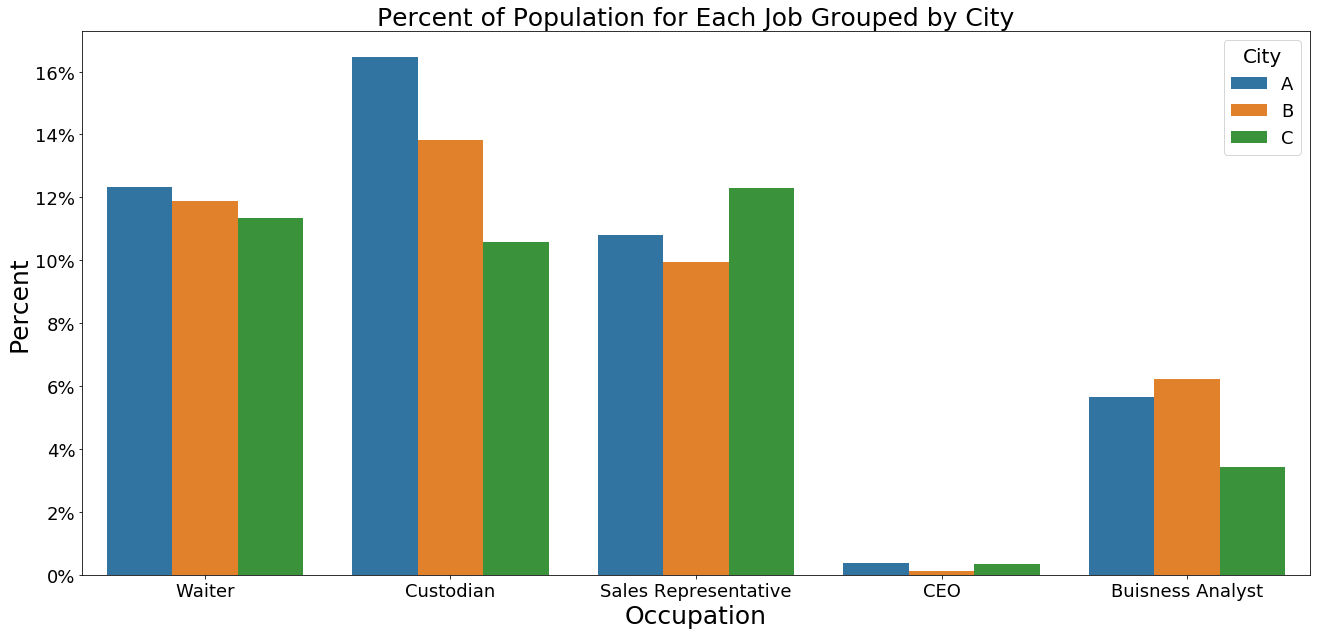

In [69]:
plt.figure(figsize = (22,10))
sns.barplot(x = jobs_5['job'], y = jobs_5['percent_of_pop_with_job'], hue = jobs_5.city)
plt.ylabel('Percent', fontsize = 25)
plt.xlabel('Occupation', fontsize = 25)
plt.xticks(fontsize = 18)
plt.yticks(np.arange(9),['0%','2%','4%','6%','8%','10%','12%','14%','16%'])
plt.yticks(np.arange(0,18, 2))
plt.yticks(fontsize = 18)
plt.title('Percent of Population for Each Job Grouped by City', fontsize = 25)
labels = ['City A', 'City B', 'City C']
plt.legend(title = 'City',title_fontsize = 20, facecolor = 'inherit', fontsize = 18)
plt.show()

In [69]:
#creating a dataframe for occupations and their average purchase amount

occupation_average_purchase = round(df.groupby('Occupation')['Purchase'].mean(),2)
occupation_average_purchase=pd.DataFrame(occupation_average_purchase)
occupation_average_purchase = occupation_average_purchase.sort_values(by = ['Purchase'], ascending = False)
occupation_average_purchase.reset_index(inplace = True)
first_three = occupation_average_purchase[:3]
last_three = occupation_average_purchase[-3:]
first_three_last_three = pd.concat([first_three, last_three])
first_three_last_three.replace(to_replace = 17, value = 'Teacher', inplace = True)
first_three_last_three.replace(to_replace = 12, value = 'Marketing Coordinator', inplace = True)
first_three_last_three.replace(to_replace = 15, value = 'Dentist',inplace = True)
first_three_last_three.replace(to_replace = 20, value = 'Mechanic', inplace = True)
first_three_last_three.replace(to_replace = 19, value = 'Artist', inplace = True)
first_three_last_three.replace(to_replace = 9, value = 'Pilot', inplace = True)
first_three_last_three['Purchase'] = round(first_three_last_three['Purchase']/75.98,2)
first_three_last_three

,Occupation,Purchase
0,Teacher,129.26
1,Marketing Coordinator,128.94
2,Dentist,128.70
18,Mechanic,116.30
19,Artist,114.64
20,Pilot,113.68


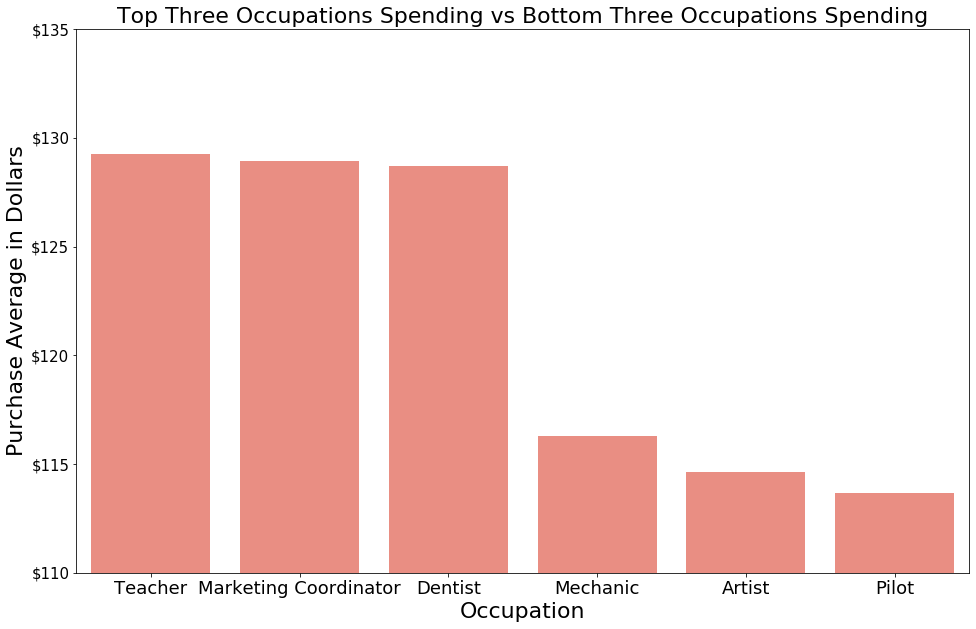

In [154]:
plt.figure(figsize = (16,10))
sns.barplot(x=first_three_last_three['Occupation'], y = first_three_last_three['Purchase'],
            order = first_three_last_three['Occupation'],
           color = 'salmon')
plt.xlabel('Occupation', fontsize = 22)
plt.ylabel('Purchase Average in Dollars', fontsize = 22)
plt.xticks(fontsize = 18)
plt.yticks(np.arange(6),['$110','$115','$120','$125','$130','$135'])
plt.yticks(np.arange(110,140, 5))
plt.yticks(fontsize = 15)
plt.ylim(110,135)
plt.title('Top Three Occupations Spending vs Bottom Three Occupations Spending', fontsize = 22)
plt.show()

In [71]:
#dataframe of age groups and their average purchase

age_purchase_avg = round(df.groupby('Age')['Purchase'].mean(), 2)
age_purchase_avg = pd.DataFrame(age_purchase_avg)
age_purchase_avg.reset_index(inplace = True)
age_purchase_avg['Purchase'] = round(age_purchase_avg['Purchase']/75.98,2)
age_purchase_avg

,Age,Purchase
0,0-17,117.58
1,18-25,120.69
2,26-35,121.78
3,36-45,122.81
4,46-50,121.20
5,51-55,125.49
6,55+,122.88


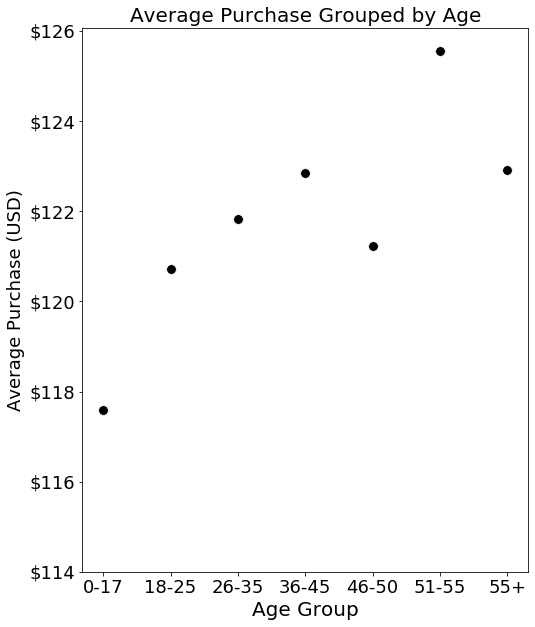

Greatest value:  117.58
Lowest value:  122.88


In [153]:
plt.figure(figsize = (8,10))
sns.scatterplot(x=age_purchase_avg['Age'], y = age_purchase_avg['Purchase'],
           color = 'black', s =95 )
plt.xlabel('Age Group', fontsize = 20)
plt.title('Average Purchase Grouped by Age', fontsize = 20)
plt.yticks(np.arange(7),['$114','$116','$118','$120','$122','$124','$126'])
plt.yticks(np.arange(114,126, 1.99))
plt.ylim(114,126)
plt.yticks(fontsize = 18)
plt.tick_params(labelsize=18)
plt.ylabel('Average Purchase (USD)',fontsize = 18)
plt.show()

print('Greatest value: ', age_purchase_avg['Purchase'][0])
print('Lowest value: ', age_purchase_avg['Purchase'][age_purchase_avg.index[-1]])

In [ ]:
#graphing average purchase of genders

gender_purchase_average = round(df.groupby('Gender')['Purchase'].mean(), 2)
gender_purchase_average = pd.DataFrame(gender_purchase_average)
gender_purchase_average.sort_values(by = ['Purchase'], ascending = False, inplace = True)
gender_purchase_average.reset_index(inplace = True)
gender_purchase_average

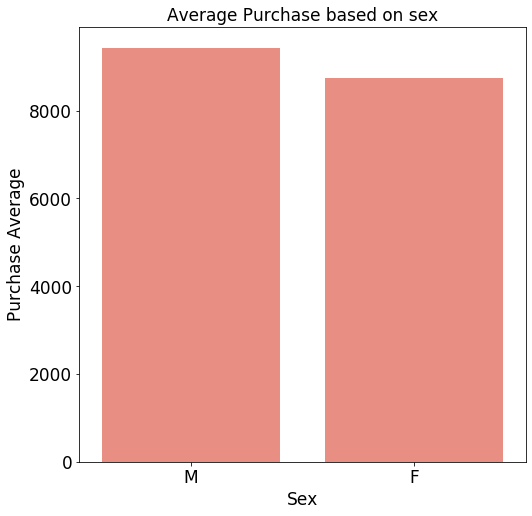

Greatest value:  9437.53
Lowest value:  8734.57 

Difference of:  702.96


In [74]:
plt.figure(figsize = (8,8))
b=sns.barplot(x=gender_purchase_average['Gender'], y = gender_purchase_average['Purchase'],
            order = gender_purchase_average['Gender'],
           color = 'salmon')
b.set_xlabel('Sex', fontsize = 17)
b.set_ylabel('Purchase Average', fontsize = 17)
b.set_title('Average Purchase based on sex', fontsize = 17)
b.tick_params(labelsize=17)
plt.show()


greater_value = gender_purchase_average['Purchase'][0]
lowest_value = gender_purchase_average['Purchase'][gender_purchase_average.index[-1]]
print('Greatest value: ', greater_value)
print('Lowest value: ', lowest_value, '\n')
print('Difference of: ', round(greater_value - lowest_value, 2))

In [75]:
#graphing with gender in an occupation and their spending averages

gender_occupation_purchase_avg = df.groupby(['Occupation','Gender'])['Purchase'].mean()
gender_occupation_purchase_avg = pd.DataFrame(gender_occupation_purchase_avg)
gender_occupation_purchase_avg.reset_index(inplace = True)
gender_occupation_purchase_avg.head()
print(min(gender_occupation_purchase_avg['Purchase']))
print(max(gender_occupation_purchase_avg['Purchase']))

8194.751186610043
10074.608695652174


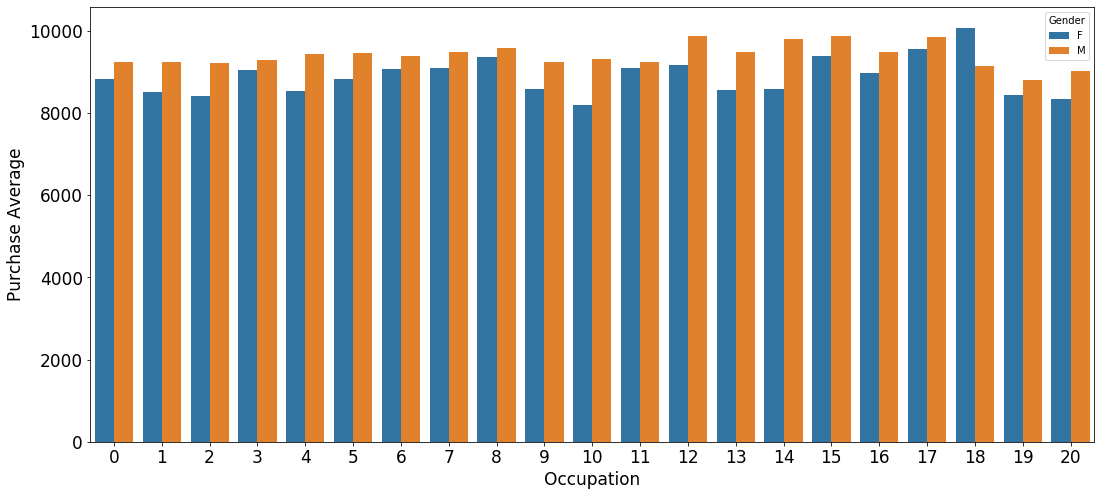

In [76]:
plt.figure(figsize = (18,8))
b=sns.barplot(x = gender_occupation_purchase_avg['Occupation'], y = gender_occupation_purchase_avg['Purchase'],
            hue = gender_occupation_purchase_avg['Gender'])

b.set_xlabel('Occupation', fontsize = 17)
b.set_ylabel('Purchase Average', fontsize = 17)
b.tick_params(labelsize=17)
plt.show()

In [80]:
# exploring percent of people who are/are not married

df.Marital_Status.value_counts(normalize = True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [81]:
#looking for differences in average purchases between people who are/are not married

df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

In [82]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending= False)

Product_Category_1
10    19675.570927
7     16365.689600
6     15838.478550
9     15537.375610
15    14780.451828
16    14766.037037
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64

In [83]:
df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending= False)

Product_Category_2
10.0    15648.729543
2.0     13619.356401
6.0     11503.551379
3.0     11235.359570
15.0    10357.077691
16.0    10295.681933
8.0     10273.259518
4.0     10215.192001
13.0     9683.352388
17.0     9421.576577
18.0     9352.440433
5.0      9027.821574
11.0     8940.580515
9.0      7277.006851
14.0     7105.264916
12.0     6975.472504
7.0      6884.683706
Name: Purchase, dtype: float64

In [84]:
df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending= False)

Product_Category_3
3.0     13939.696574
10.0    13505.813441
6.0     13194.311043
13.0    13185.118703
8.0     13024.918882
15.0    12339.369900
5.0     12117.786889
11.0    12091.437673
16.0    11981.890642
17.0    11769.943001
18.0    10993.980773
9.0     10431.697210
14.0    10052.594530
4.0      9794.386667
12.0     8715.512762
Name: Purchase, dtype: float64

In [85]:
df.loc[df['Product_Category_1']==1]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
...,...,...,...,...,...,...,...,...,...,...,...,...
545887,1006036,P00127742,F,26-35,15,B,4+,1,1,2.0,15.0,11398
545889,1006036,P00129342,F,26-35,15,B,4+,1,1,5.0,15.0,7830
545890,1006036,P00244142,F,26-35,15,B,4+,1,1,2.0,15.0,7846
545908,1006040,P00127642,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [86]:
df.groupby(['Marital_Status']).count()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Marital_Status,,,,,,,,,,,
0,324731,324731,324731,324731,324731,324731,324731,324731,223483,99619,324731
1,225337,225337,225337,225337,225337,225337,225337,225337,152947,67202,225337


In [87]:
df.Product_Category_1.count

<bound method Series.count of 0          3
1          1
2         12
3         12
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category_1, Length: 550068, dtype: int64>

In [91]:
df.Product_Category_2.count

<bound method Series.count of 0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 550068, dtype: float64>

In [93]:
city_a.shape

(21, 3)

In [94]:
#exploring what occupation 1 

city_a = df.loc[df['City_Category']=='A']
occupation_1 = city_a.loc[city_a['Occupation']==1]
occupation_1.drop_duplicates(subset = 'User_ID', inplace = True)
occupation_1

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
392,1000064,P00110942,M,18-25,1,A,1,1,1,2.0,NaN,19462
406,1000069,P00184942,F,26-35,1,A,1,0,1,8.0,17.0,11715
1370,1000222,P00114342,M,26-35,1,A,1,0,1,8.0,17.0,15204
1977,1000315,P00326842,F,55+,1,A,3,1,5,8.0,NaN,1810
2227,1000347,P00034742,F,55+,1,A,1,0,5,14.0,17.0,6872
...,...,...,...,...,...,...,...,...,...,...,...,...
59394,1003186,P00354742,M,51-55,1,A,3,0,8,NaN,NaN,6088
75263,1005601,P00075742,M,36-45,1,A,2,1,8,14.0,NaN,8041
77772,1005984,P00196642,M,26-35,1,A,4+,0,8,14.0,NaN,9737
99158,1003388,P00260042,F,26-35,1,A,4+,0,5,8.0,NaN,8773


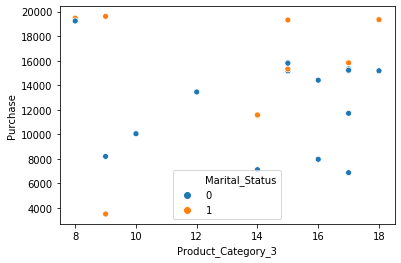

In [95]:
sns.scatterplot(x = occupation_1.Product_Category_3, y = occupation_1.Purchase, hue = occupation_1.Marital_Status)

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [97]:
y = occupation_1.Purchase.values.reshape(-1,1)
X = occupation_1.Product_Category_1.values.reshape(-1,1)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = .8, random_state = 12)

In [99]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
y_hat = lr.predict(X_test)

In [101]:
lr.score(y_hat, y_test)

-2582817.978224819

In [102]:
mean_squared_error(y_test, y_hat)

15187924.119305344

In [103]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [104]:
marriages = df.loc[df['Marital_Status']==1]

In [105]:
marriages.drop_duplicates(subset = 'User_ID', inplace = True)
marriages.head()

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
18,1000007,P00036842,M,36-45,1,B,1,1,1,14.0,16.0,11788
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.0,15.0,19614
29,1000010,P00085942,F,36-45,1,B,4+,1,2,4.0,8.0,16352


In [106]:
prod_1 = marriages.loc[marriages['Product_Category_1']==1]
prod_1.fillna(value = 0, inplace = True)
prod_1.loc[prod_1['Product_Category_2']==0]

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
2331,1000363,P00274142,M,18-25,10,B,1,1,1,0.0,0.0,15217
6379,1001031,P00274242,M,36-45,16,C,2,1,1,0.0,0.0,15722
6605,1001066,P00274142,M,46-50,12,C,3,1,1,0.0,0.0,15815
7307,1001147,P00274142,M,26-35,20,B,3,1,1,0.0,0.0,15880
7531,1001176,P00218442,M,55+,1,C,1,1,1,0.0,0.0,15399
7910,1001225,P00274142,M,46-50,7,C,1,1,1,0.0,0.0,11532
8262,1001274,P00338542,M,46-50,7,B,4+,1,1,0.0,0.0,12113
10174,1001575,P00274142,F,51-55,7,C,4+,1,1,0.0,0.0,11990
12273,1001850,P00274142,M,18-25,5,C,0,1,1,0.0,0.0,15226
22330,1003508,P00038442,M,18-25,4,C,0,1,1,0.0,0.0,11777


In [107]:
len(df.Product_ID.unique())

3631

In [108]:
df.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00074742       1
P00013442       1
P00308042       1
P00167242       1
P00206242       1
Name: Product_ID, Length: 3631, dtype: int64

In [109]:
P00274142 = df.loc[df['Product_ID']=='P00274142']
print(min(P00274142.Purchase))
P00274142
print(max(P00274142.Purchase))

3921
19702


In [110]:
P00274142.loc[P00274142['Purchase']==3921]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
78594,1000087,P00274142,M,26-35,14,C,2,0,1,NaN,NaN,3921


In [111]:
P00274142.loc[P00274142['Purchase']==19702]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
166404,1001686,P00274142,M,36-45,12,B,1,0,1,NaN,NaN,19702


In [112]:
products_in_city_a = df.loc[df['City_Category']=='A']

In [113]:
P00274142=products_in_city_a.loc[products_in_city_a['Product_ID']=='P00274142']
P00274142

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1207,1000198,P00274142,M,26-35,12,A,0,1,1,NaN,NaN,15883
1929,1000308,P00274142,M,26-35,2,A,3,1,1,NaN,NaN,11899
3170,1000523,P00274142,M,51-55,7,A,1,1,1,NaN,NaN,19033
6807,1001088,P00274142,F,0-17,10,A,3,0,1,NaN,NaN,15628
9507,1001449,P00274142,M,36-45,20,A,1,1,1,NaN,NaN,11804
...,...,...,...,...,...,...,...,...,...,...,...,...
521918,1002335,P00274142,M,51-55,17,A,3,0,1,NaN,NaN,11629
524379,1002820,P00274142,F,36-45,0,A,2,0,1,NaN,NaN,8152
534377,1004277,P00274142,M,36-45,16,A,0,0,1,NaN,NaN,19378
536064,1004501,P00274142,M,26-35,17,A,1,1,1,NaN,NaN,15772


In [114]:
P00274142.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,9.800000e+01,98.000000,98.000000,98.0,0.0,0.0,98.000000
mean,1.002723e+06,8.969388,0.387755,1.0,NaN,NaN,15089.653061
std,1.805986e+03,6.441576,0.489743,0.0,NaN,NaN,3364.398815
min,1.000019e+06,0.000000,0.000000,1.0,NaN,NaN,4424.000000
25%,1.001197e+06,4.000000,0.000000,1.0,NaN,NaN,11911.750000
50%,1.002387e+06,7.000000,0.000000,1.0,NaN,NaN,15504.000000
75%,1.004307e+06,15.000000,1.000000,1.0,NaN,NaN,19029.500000
max,1.006028e+06,20.000000,1.000000,1.0,NaN,NaN,19665.000000


In [115]:
customer = df.loc[df['User_ID']==1000198]
value_4 = customer.loc[customer['Product_Category_1'] == 4]
value_4.loc[value_4['Product_Category_2']==5]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1195,1000198,P00250542,M,26-35,12,A,0,1,4,5.0,NaN,2738
1198,1000198,P00316742,M,26-35,12,A,0,1,4,5.0,NaN,2863
195701,1000198,P0094342,M,26-35,12,A,0,1,4,5.0,18.0,2865
234830,1000198,P0095242,M,26-35,12,A,0,1,4,5.0,NaN,2184
312834,1000198,P00057342,M,26-35,12,A,0,1,4,5.0,NaN,3460
391259,1000198,P00316842,M,26-35,12,A,0,1,4,5.0,NaN,2803
468769,1000198,P00187342,M,26-35,12,A,0,1,4,5.0,15.0,1420


In [116]:
graph_a=df.loc[df['Product_ID']=='P0094342']

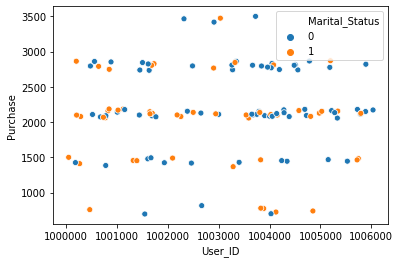

In [117]:
sns.scatterplot(x = graph_a.User_ID, y = graph_a.Purchase, hue = graph_a.Marital_Status)

In [118]:
products = list(df.Product_ID.unique())

In [119]:
products

['P00069042',
 'P00248942',
 'P00087842',
 'P00085442',
 'P00285442',
 'P00193542',
 'P00184942',
 'P00346142',
 'P0097242',
 'P00274942',
 'P00251242',
 'P00014542',
 'P00031342',
 'P00145042',
 'P00231342',
 'P00190242',
 'P0096642',
 'P00058442',
 'P00036842',
 'P00249542',
 'P00220442',
 'P00156442',
 'P00213742',
 'P00214442',
 'P00303442',
 'P00135742',
 'P00039942',
 'P00161442',
 'P00078742',
 'P00085942',
 'P00118742',
 'P00297942',
 'P00266842',
 'P00058342',
 'P00032442',
 'P00105942',
 'P00182642',
 'P00186942',
 'P00155442',
 'P00221342',
 'P00087242',
 'P00111142',
 'P00259342',
 'P0094542',
 'P00148642',
 'P00312142',
 'P00113242',
 'P00192642',
 'P00110842',
 'P00189642',
 'P00304242',
 'P00365242',
 'P00129542',
 'P00140742',
 'P00182342',
 'P00276642',
 'P00334242',
 'P00247542',
 'P00338442',
 'P00275142',
 'P00333042',
 'P00166242',
 'P00161942',
 'P00348242',
 'P00042142',
 'P00244242',
 'P00217742',
 'P00019342',
 'P00100642',
 'P00073842',
 'P00366542',
 'P001907

In [121]:
user_1 = df.loc[df['User_ID']==1000001]
user_1.loc[user_1['Product_ID']=='P00087842']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [122]:
len(user_1.Product_ID.unique())

35